# Softmax Classifier

This exercise guides you through the process of classifying images using a Softmax classifier. As part of this you will:

- Implement a fully vectorized loss function for the Softmax classifier
- Calculate the analytical gradient using vectorized code
- Tune hyperparameters on a validation set
- Optimize the loss function with Stochastic Gradient Descent (SGD)
- Visualize the learned weights

In [1]:
# start-up code! 
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
from load_cifar10_tvt import load_cifar10_train_val
X_train, y_train, X_val, y_val, X_test, y_test = load_cifar10_train_val()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Val data shape: ', X_val.shape)
print('Val labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train, validation and testing sets have been created as 
 X_i and y_i where i=train,val,test
('Train data shape: ', (3073, 49000))
('Train labels shape: ', (49000,))
('Val data shape: ', (3073, 1000))
('Val labels shape: ', (1000,))
('Test data shape: ', (3073, 1000))
('Test labels shape: ', (1000,))


Code for this section is to be written in `f17cs7643/classifiers/softmax.py`

In [3]:
# Now, implement the vectorized version in softmax_loss_vectorized.

import time
from f17cs7643.classifiers.softmax import softmax_loss_vectorized

W = np.random.randn(10, 3073) * 0.0001

tic = time.time()
loss, grad = softmax_loss_vectorized(W, X_train, y_train, 0.00001)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss, toc - tic))

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

# gradient check. 
from f17cs7643.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_vectorized(w, X_train, y_train, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

vectorized loss: 2.382548e+00 computed in 0.556550s
loss: 2.382548
sanity check: 2.302585
numerical: 0.679529 analytic: 0.679529, relative error: 4.840400e-09
numerical: -0.488319 analytic: -0.488319, relative error: 3.080882e-08
numerical: -1.117220 analytic: -1.117220, relative error: 1.141725e-08
numerical: -0.231563 analytic: -0.231563, relative error: 2.801263e-08
numerical: -0.548730 analytic: -0.548730, relative error: 6.514298e-08
numerical: 0.404737 analytic: 0.404737, relative error: 7.955101e-08
numerical: -0.864153 analytic: -0.864153, relative error: 5.388033e-09
numerical: -3.077425 analytic: -3.077425, relative error: 1.241752e-08
numerical: -2.120440 analytic: -2.120440, relative error: 2.849430e-09
numerical: -1.697229 analytic: -1.697229, relative error: 3.198159e-09


### Fine-tuning
#### batch size

In [4]:
N = X_train.shape[1]
N

49000

In [5]:
from f17cs7643.classifiers import Softmax


cross_learning_rate = [1e-7,1e-6,1e-5,1e-4,1e-3]
cross_reg = [1e1,1e2,1e3,1e4,1e5]
accuracy = []
batch_size = 64
for learning_rate in cross_learning_rate:
    for reg in cross_reg:
        
        classifier = Softmax()
        loss_hist = classifier.train(X_train, y_train, learning_rate=learning_rate, reg=reg,
                                     num_iters=int(N/batch_size), batch_size=int(batch_size), verbose=False)

        # Evaluate on eval set
        y_val_pred = classifier.predict(X_val)
        val_accuracy = np.mean(y_val == y_val_pred)
        accuracy.append([val_accuracy, reg, learning_rate])
        #print('softmax on raw pixels final test set accuracy: %f with reg %f and lr %f' % (val_accuracy, reg, learning_rate))
    

print('cross search done')

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


f17cs7643/classifiers/softmax.py:28: RuntimeWarning: divide by zero encountered in log
  loss = - np.sum(np.log(p[y, np.arange(0, N)]))/ N + reg * R
f17cs7643/classifiers/softmax.py:24: RuntimeWarning: invalid value encountered in divide
  p = exp_z / np.sum(exp_z, axis = 0) # softmax
/usr/local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
cross search done


In [6]:
# Three best parameter values from the training validation
acc_ = np.array(accuracy)[:, 0]
acc_[np.argsort(acc_)]

best_ = np.argsort(acc_)[-3:]
np.array(accuracy)[best_]

array([[3.16e-01, 1.00e+04, 1.00e-07],
       [3.33e-01, 1.00e+04, 1.00e-06],
       [3.89e-01, 1.00e+03, 1.00e-06]])

float64


Text(0,0.5,'Loss value')

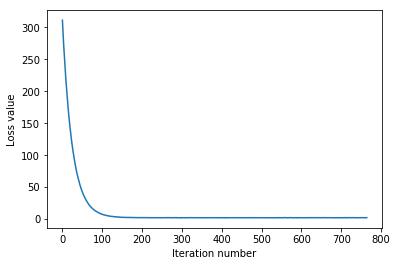

In [7]:
# Now that efficient implementations to calculate loss function and gradient of the softmax are ready,
# use it to train the classifier on the cifar-10 data
batch_size = 64
classifier = Softmax()
loss_hist = classifier.train(X_train, y_train, learning_rate=1e-6, reg=1e4, num_iters=N/batch_size, 
                             batch_size=batch_size, verbose=False)
# Plot loss vs. iterations
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')

In [8]:
# Evaluate on test set
y_test_pred = classifier.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('softmax on raw pixels final test set accuracy: %f' % (test_accuracy, ))

softmax on raw pixels final test set accuracy: 0.347000


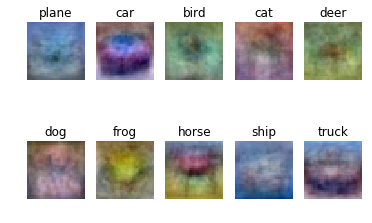

In [9]:
# Visualize the learned weights for each class
w = classifier.W[:,:-1] # strip out the bias
w = w.reshape(10, 32, 32, 3)

w_min, w_max = np.min(w), np.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i + 1)

    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])